In [5]:
import pandas as pd


path = "C:\\Users\\omars\\OneDrive\\Bureau\\EPF 5A\\NLP\\Project_nlp\\DATASET_FOOT\\events.csv"
df = pd.read_csv(path)


**My project**
I chose to do my project on the theme of soccer, I found a dataset on kaggle that refers to the comments of several soccer matches. My goal is to analyze the text and build a model that will be able to predict, thanks to the comments, whether or not there will be a goal at the end of the action.

In [6]:
#exploring data first five rows we can see that the column text is the one that will be important for us, we will study the column event type to 
df.head()



id_odsp   id_event  sort_order  time  \
0  UFot0hit/  UFot0hit1           1     2   
1  UFot0hit/  UFot0hit2           2     4   
2  UFot0hit/  UFot0hit3           3     4   
3  UFot0hit/  UFot0hit4           4     7   
4  UFot0hit/  UFot0hit5           5     7   

                                                text  event_type  event_type2  \
0  Attempt missed. Mladen Petric (Hamburg) left f...           1         12.0   
1  Corner,  Borussia Dortmund. Conceded by Dennis...           2          NaN   
2  Corner,  Borussia Dortmund. Conceded by Heiko ...           2          NaN   
3           Foul by Sven Bender (Borussia Dortmund).           3          NaN   
4  Gokhan Tore (Hamburg) wins a free kick in the ...           8          NaN   

   side         event_team           opponent  ... player_in player_out  \
0     2         Hamburg SV  Borussia Dortmund  ...       NaN        NaN   
1     1  Borussia Dortmund         Hamburg SV  ...       NaN        NaN   
2     1  Borussia Dortmund         Hamburg SV  ...       NaN        NaN   
3     1  Borussia Dortmund         Hamburg SV  ...       NaN        NaN   
4     2         Hamburg SV  Borussia Dortmund  ...       NaN        NaN   

  shot_place shot_outcome  is_goal  location  bodypart  assist_method  \
0        6.0          2.0        0       9.0       2.0              1   
1        NaN          NaN        0       NaN       NaN              0   
2        NaN          NaN        0       NaN       NaN              0   
3        NaN          NaN        0       NaN       NaN              0   
4        NaN          NaN        0       2.0       NaN              0   

   situation  fast_break  
0        1.0           0  
1        NaN           0  
2        NaN           0  
3        NaN           0  
4        NaN           0  

[5 rows x 22 columns]

In [7]:
df.tail() #Last five rows

id_odsp     id_event  sort_order  time  \
941004  z5L2OT5E/  z5L2OT5E123         123    92   
941005  z5L2OT5E/  z5L2OT5E124         124    93   
941006  z5L2OT5E/  z5L2OT5E125         125    93   
941007  z5L2OT5E/  z5L2OT5E126         126    94   
941008  z5L2OT5E/  z5L2OT5E127         127    94   

                                                     text  event_type  \
941004  Lucas Torreira (Sampdoria) wins a free kick in...           8   
941005   Corner,  Sampdoria. Conceded by Andrea Masiello.           2   
941006  Attempt missed. Fabio Quagliarella (Sampdoria)...           1   
941007  Alberto Grassi (Atalanta) wins a free kick on ...           8   
941008                 Foul by Pedro Pereira (Sampdoria).           3   

        event_type2  side event_team   opponent  ... player_in player_out  \
941004          NaN     2  Sampdoria   Atalanta  ...       NaN        NaN   
941005          NaN     2  Sampdoria   Atalanta  ...       NaN        NaN   
941006         12.0     2  Sampdoria   Atalanta  ...       NaN        NaN   
941007          NaN     1   Atalanta  Sampdoria  ...       NaN        NaN   
941008          NaN     2  Sampdoria   Atalanta  ...       NaN        NaN   

       shot_place shot_outcome  is_goal  location  bodypart  assist_method  \
941004        NaN          NaN        0       2.0       NaN              0   
941005        NaN          NaN        0       NaN       NaN              0   
941006        8.0          2.0        0       9.0       1.0              1   
941007        NaN          NaN        0       4.0       NaN              0   
941008        NaN          NaN        0       NaN       NaN              0   

        situation  fast_break  
941004        NaN           0  
941005        NaN           0  
941006        3.0           0  
941007        NaN           0  
941008        NaN           0  

[5 rows x 22 columns]

We can see that two columns of the dataset are of interest to us: the "text" column contains the comments that will lead to a goal, while the data justifying whether or not there is a goal is contained in the 'is_goal' column.

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

In [9]:
df.describe()
# we can see here that we have 941009 rows (text commentary)

sort_order           time     event_type    event_type2  \
count  941009.000000  941009.000000  941009.000000  214293.000000   
mean       53.858826      49.663663       4.326575      12.233764   
std        32.014268      26.488977       2.995313       0.468850   
min         1.000000       0.000000       1.000000      12.000000   
25%        27.000000      27.000000       2.000000      12.000000   
50%        53.000000      51.000000       3.000000      12.000000   
75%        79.000000      73.000000       8.000000      12.000000   
max       180.000000     100.000000      11.000000      15.000000   

                side     shot_place   shot_outcome        is_goal  \
count  941009.000000  227459.000000  228498.000000  941009.000000   
mean        1.481170       5.733693       1.926555       0.025978   
std         0.499646       3.326100       0.797055       0.159071   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000       2.000000       1.000000       0.000000   
50%         1.000000       5.000000       2.000000       0.000000   
75%         2.000000       9.000000       3.000000       0.000000   
max         2.000000      13.000000       4.000000       1.000000   

            location       bodypart  assist_method      situation  \
count  467067.000000  229185.000000  941009.000000  229137.000000   
mean        6.209073       1.624831       0.264332       1.281316   
std         5.421736       0.740400       0.655501       0.709394   
min         1.000000       1.000000       0.000000       1.000000   
25%         2.000000       1.000000       0.000000       1.000000   
50%         3.000000       1.000000       0.000000       1.000000   
75%        11.000000       2.000000       0.000000       1.000000   
max        19.000000       3.000000       4.000000       4.000000   

          fast_break  
count  941009.000000  
mean        0.004876  
std         0.069655  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [10]:
df.isnull().sum() #these null values are not a problem because it represent things that can or cannot happen in a football game (for example all action do not have a type of event like the event_type2 dictionnary event_type2)


id_odsp               0
id_event              0
sort_order            0
time                  0
text                  0
event_type            0
event_type2      726716
side                  0
event_team            0
opponent              0
player            61000
player2          649699
player_in        889294
player_out       889271
shot_place       713550
shot_outcome     712511
is_goal               0
location         473942
bodypart         711824
assist_method         0
situation        711872
fast_break            0
dtype: int64

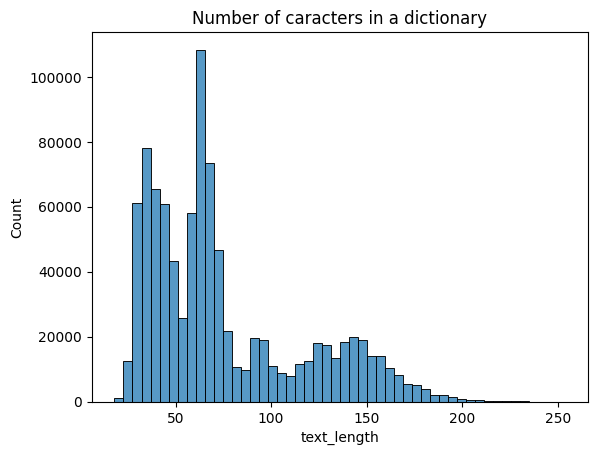

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 
df['text_length'] = df['text'].apply(len)
sns.histplot(df['text_length'], bins=50)
plt.title('Number of caracters in a dictionary')
plt.show()


In [12]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split(' ')))
print(df['text_length'].describe()) #print statistique about the number of word in a dictionnary 


count    941009.000000
mean         12.492876
std           7.290624
min           3.000000
25%           7.000000
50%          11.000000
75%          15.000000
max          51.000000
Name: text_length, dtype: float64


In [13]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [14]:
df['text'].head()

0    Attempt missed. Mladen Petric (Hamburg) left f...
1    Corner,  Borussia Dortmund. Conceded by Dennis...
2    Corner,  Borussia Dortmund. Conceded by Heiko ...
3             Foul by Sven Bender (Borussia Dortmund).
4    Gokhan Tore (Hamburg) wins a free kick in the ...
Name: text, dtype: object

In [15]:
def remove_special_characters(text):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text #Removes special characters from the text. Even if they are not many special caracters in the dataframe I did this def as security


In [16]:
def demonstrate_preprocessing_on_series(func, series, max_iterations=20000):
    iteration_count = 0
    transformed_series = series.copy()  # create a copy to avoid changing the original dataset

    for idx, value in series.items():
        if iteration_count >= max_iterations:
            break
        
        before = value
        after = func(value)
        print(f"Index {idx}:\nBefore: {before}\nAfter: {after}\n")
        
        transformed_series[idx] = after
        iteration_count += 1

    return transformed_series



#df['text'] = demonstrate_preprocessing_on_series(remove_special_characters, df['text'])


*To test any of the definition we can uncomment the last line*

In [17]:
def lower_case(text):
    return text.lower()
#df['text'] = demonstrate_preprocessing_on_series(lower_case, df['text']) 
#We tranform all characters of the text in lowercase to ensure that there is no ambiguity

In [18]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))  
    tokens = text.split()
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)
#df['text'] = demonstrate_preprocessing_on_series(remove_stopwords, df['text']) 
#Stopwords (common words such as "and", "the", "to", etc...) generally don't provide much relevant informations.

In [19]:
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)
#df['text'] = demonstrate_preprocessing_on_series(lemmatize, df['text']) #Reduces words to their basic form

In [20]:
def preprocess_text(text):
    text = remove_special_characters(text)
    text = lower_case(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    return text
df['text'] = demonstrate_preprocessing_on_series(preprocess_text, df['text']) #We test the processing pipeline with all the def we define before


Index 0:
Before: Attempt missed. Mladen Petric (Hamburg) left footed shot from the left side of the box is high and wide to the left. Assisted by Gokhan Tore.
After: attempt missed mladen petric hamburg left footed shot left side box high wide left assisted gokhan tore

Index 1:
Before: Corner,  Borussia Dortmund. Conceded by Dennis Diekmeier.
After: corner borussia dortmund conceded dennis diekmeier

Index 2:
Before: Corner,  Borussia Dortmund. Conceded by Heiko Westermann.
After: corner borussia dortmund conceded heiko westermann

Index 3:
Before: Foul by Sven Bender (Borussia Dortmund).
After: foul sven bender borussia dortmund

Index 4:
Before: Gokhan Tore (Hamburg) wins a free kick in the defensive half.
After: gokhan tore hamburg win free kick defensive half

Index 5:
Before: Hand ball by Jose Paolo Guerrero (Hamburg).
After: hand ball jose paolo guerrero hamburg

Index 6:
Before: Corner,  Hamburg. Conceded by Lukasz Piszczek.
After: corner hamburg conceded lukasz piszczek

Index

In [21]:
def vectorize_text(df, column_name):
    vectorizer = TfidfVectorizer(max_features=5000)  
    X = vectorizer.fit_transform(df[column_name])
    return X
#Convert text into digital vectors for use by ML models

In [22]:
def preprocess_pipeline(df, text_column):
    df[text_column] = df[text_column].apply(preprocess_text).dropna()
    X = vectorize_text(df, text_column)
    return X

In [23]:
df = pd.read_csv(path)

df_sampled = df.head(150000)

#I taked a subset because I had a prpoblem with the memory but i fixed it later, but the subset remain a good idea

X = preprocess_pipeline(df_sampled, 'text').astype('float32') #try to transform the float64 to floats32 to handle memory issues
print(f"Sampled dataset size: {len(df_sampled)}") #it shows that we will work with almost 150000 data


C:\Users\omars\AppData\Local\Temp\ipykernel_20208\2086717923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].apply(preprocess_text).dropna()


Sampled dataset size: 150000


In [24]:
from sklearn.model_selection import train_test_split
y = df_sampled['is_goal']  #permit to the model to tell if it's a goal or not 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #divise dataset into a training set and a test set



In [25]:
from sklearn.linear_model import LogisticRegression
from scipy import sparse

class BaseModel:
    def __init__(self):
        
        self.model = LogisticRegression(solver='saga', max_iter=100)

    def train(self, X, y):
        try:
            self.model.fit(X, y)
        except Exception as e: #add this to see when my train method is not working (it helped me fix the problem)
            print(f"An error occurred during training: {e}")
            self.model = None

    def predict(self, X):
        X_sparse = sparse.csr_matrix(X)
        return self.model.predict(X_sparse)

# Convert my training and testing sets to sparse matrices if they aren't already
X_train_sparse = sparse.csr_matrix(X_train)
X_test_sparse = sparse.csr_matrix(X_test)

baseline = BaseModel()
baseline.train(X_train_sparse, y_train)


In [26]:
from sklearn.metrics import accuracy_score
y_pred = baseline.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy:.2f}")

Baseline Model Accuracy: 1.00


**Model accuracy**
I had a problem with my model because it was not predicting if it was a goal or not, once I told my model to focus on the column 'is_goal' my model had pass from running 25 minutes to 1 minutes and the accuracy passed from 0,16 to 1.

It is not surprising that the accuracy score is 1 because there is the distribution of classes (goal or no goal) is unbalanced, the model could be biased in favour of the majority class (no goal). Let's try to adjust the model with the SMOTE methode wich is an oversampling methode that permit to balance classes in an unbalanced dataset

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train_sparse, y_train)

baseline = BaseModel()
baseline.train(X_train_balanced, y_train_balanced)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9996333333333334

Here we trained another time our model with a balnced dataset, the accuracy is not 1 anymore but 0,99 so it is more realistic 

In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
df_sampled['text'] = df_sampled['text'].apply(preprocess_text).dropna()

# Tokenisation
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_sampled['text'])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(df_sampled['text'])
padded_sequences = pad_sequences(sequences, maxlen=200, padding='post') #to make sur the sequences have the same lenght


C:\Users\omars\AppData\Local\Temp\ipykernel_20208\1584964362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled['text'] = df_sampled['text'].apply(preprocess_text).dropna()


In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(df_sampled['is_goal'])

##divise dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

# SMOTE to balanced the training dataset
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Callback to stop the training when they are no more improvment
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

model = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=200),
    LSTM(32, return_sequences=True),
    LSTM(16),
    Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train, y_train, batch_size=256, epochs=3, 
          validation_data=(X_test, y_test),
          callbacks=[early_stopping])  #call the callback

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Sequence Model Accuracy: {accuracy:.2f}")

Epoch 1/3
915/915 [==============================] - 176s 190ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6936 - val_accuracy: 0.0238
Epoch 2/3
915/915 [==============================] - 176s 192ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6926 - val_accuracy: 0.9762
Epoch 3/3
938/938 [==============================] - 24s 25ms/step - loss: 0.6840 - accuracy: 0.9762
Sequence Model Accuracy: 0.98


Here the accuracy of the model is close to 0.98 so we can say that the model is working well but the model is actually quite simple because most of the comments don't lead to a goal, which is why we've used smote to balance the dataset, the system is still very reliable for the moment.

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Non-Goal', 'Goal']))

              precision    recall  f1-score   support

    Non-Goal       1.00      1.00      1.00     29286
        Goal       1.00      0.98      0.99       714

    accuracy                           1.00     30000
   macro avg       1.00      0.99      1.00     30000
weighted avg       1.00      1.00      1.00     30000



The model does well on 'No-Goal' predict, which is expect cause we have lots of 'No-Goal' data. While the F1 score provides a balanced view between precision and recall, the model could still benefit from more balanced training data. 